# Adam
It is combination of momentum and RMS prop

$$
m_t = (\beta_1 * m_{t-1}) + ((1 - \beta_1) * \nabla x) \\
v_t = (\beta_2 * v_{t-1}) + ((1 - \beta_2) * (\nabla x * \nabla x)) \\
\^m_t = m_t / (1 - \beta_1^t) \\
\^v_t = v_t / (1 - \beta_2^t) \\
x_{t+1} = x_t - lr*(\^m_t/\sqrt{\^v_t} + \epsilon)
$$ 

In [2]:
import math
import matplotlib.pyplot as plt

In [3]:
def fun(x):
    '''
    x : value
    '''
    return x**2

def grad_fun(x):
    '''
    x : value
    '''
    return (2 * x + 0.00001)

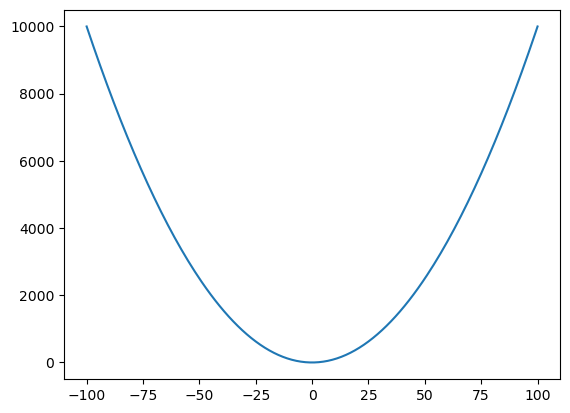

In [4]:
#test place
x = range(-100,101)
y = [fun(i) for i in x]
plt.plot(x,y)
plt.show()

88.1999999
86.435999802
84.70727970595999
83.01313401184079
81.35287123160397
79.72581370697189
78.13129733283246
76.56867128617581
75.0372977604523
73.53655170524326


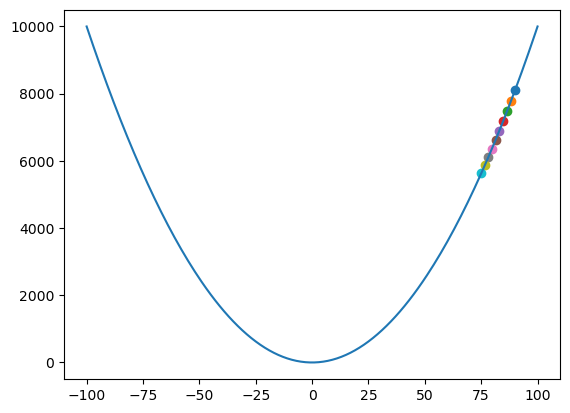

In [5]:
#SGD
x1 = 90
y1 = fun(x1)

plt.plot(x,y)
for i in range(10):
    plt.scatter(x1,y1)
    x1 = x1 -( 0.01 * grad_fun(x1))
    y1 = fun(x1)
    print(x1)
plt.show()

80.00000000000155
70.04522972019566
60.17546496212636
50.43952957092438
40.89682104056624
31.618630717109497
22.68885858848226
14.203541454430475
6.268495467828591
-1.0055360281020684


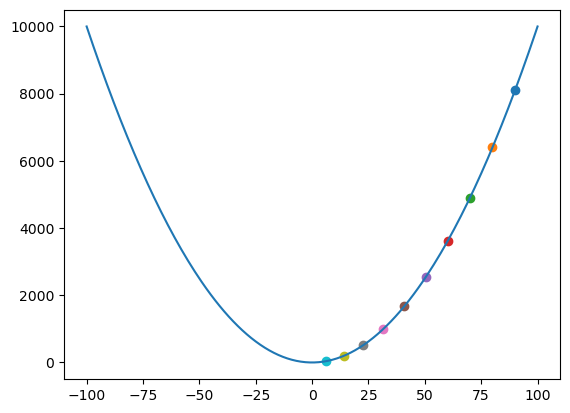

In [6]:
# Adam

x1 = 90
y1 = fun(x1)
em = 0
ev = 0
lr = 10
beta1 = 0.9
beta2 = 0.99
epsilon = 0.00000001

plt.plot(x,y)
for i in range(10):
    plt.scatter(x1,y1)
    g = grad_fun(x1)
    
    em = (beta1 * em) + ((1 - beta1) * g)
    ev = (beta2 * ev) + ((1 - beta2) * (g * g))

    cm = em / (1 - (beta1 ** (i + 1)))
    cv = ev / (1 - (beta2 ** (i + 1)))

    x1 = x1 -(lr * (cm/math.sqrt(cv + epsilon)))
    y1 = fun(x1)
    print(x1)
plt.show()

80.00000000000155
70.04522972019566
60.17546496212636
50.43952957092438
40.89682104056624
31.618630717109497
22.68885858848226
14.203541454430475
6.268495467828591
-1.0055360281020684
-7.510381961484645
-13.149889371486452
-17.849634231569652
-21.56466755947468
-24.283437325304384
-26.02725105250724
-26.846057837267168
-26.81219154608516
-26.01376341579996
-24.548875031084975
-22.52116483299696
-20.03668929649901
-17.201855078471233
-14.12201840926987
-10.900379748860697
-7.636869629806885
-4.426816473899291
-1.359297161792318
1.4848110342688483
4.034945189600643


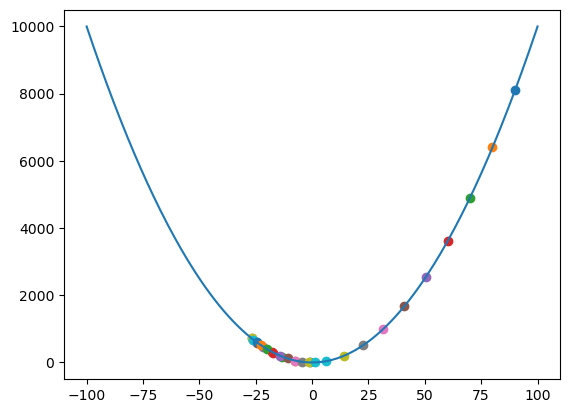

In [7]:
# Just to check ossicilation

x1 = 90
y1 = fun(x1)
em = 0
ev = 0
lr = 10 # This one need to be 0.01 
beta1 = 0.9
beta2 = 0.99
epsilon = 0.00000001

plt.plot(x,y)
for i in range(30):
    plt.scatter(x1,y1)
    g = grad_fun(x1)
    
    em = (beta1 * em) + ((1 - beta1) * g)
    ev = (beta2 * ev) + ((1 - beta2) * (g * g))
    
    cm = em / (1 - (beta1 ** (i + 1)))
    cv = ev / (1 - (beta2 ** (i + 1)))

    x1 = x1 -  lr * ( cm/math.sqrt(cv + epsilon))
    y1 = fun(x1)
    print(x1)
plt.show()

# Adamax
As of now every where $l_2$ norm is used in adamax $l_n$ will be used
l_2 norm looks like this
$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) |g_t|^2
$$
The L2 norm can be generalized to the $l_n$ norm.

$$v_t = \beta_2^n v_{t-1} + (1 - \beta_2^n) |g_t|^n$$

$$
 m = \beta_1 * m + (1-\beta_1) * g \\
 u = max(\beta_2 * u, |g|) \\
 clr = lr / (1-\beta_1^t) \\
 w = w - clr * \frac{m}{u+\epsilon}
$$

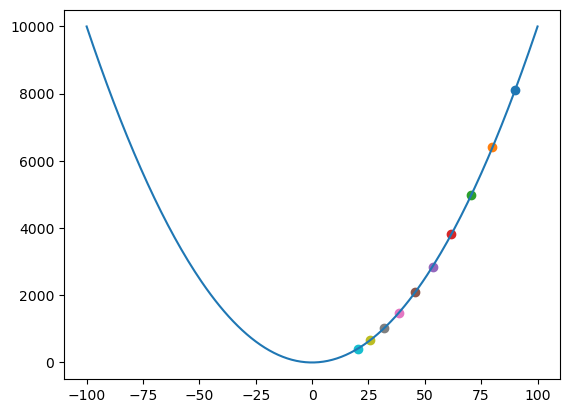

In [10]:
beta1 = 0.9
beta2 = 0.999
lr = 10
mv = 0
mu = 0
x1 = 90
y1 = fun(x1)
epsilon = 0.00000001


plt.plot(x,y)
for i in range(10):
    plt.scatter(x1,y1)
    g = grad_fun(x1)
    mv = (beta1 * mv) + ((1- beta1) * g)
    mu = max(beta2* mu, abs(g))
    clr = lr/(1-(beta1 ** (i+1)))
    x1 = x1 - clr * (mv/(mu+epsilon))
    y1 = fun(x1)

# NADAM

NADAM, or Nesterov-accelerated Adaptive Moment Estimation, combines Adam and Nesterov Momentum. The update rule is of the form:

$$
m_t = (\beta_1 * m_{t-1}) + ((1 - \beta_1) * \nabla x) \\
v_t = (\beta_2 * v_{t-1}) + ((1 - \beta_2) * (\nabla x * \nabla x)) \\
\^m_t = m_t / (1 - \beta_1^t) \\
\^v_t = v_t / (1 - \beta_2^t) \\
x_{t+1} = x_{t} - (lr/\sqrt{\^{v_t} + \epsilon}) * (\beta_1 \^{m_t} + \frac{(1 - \beta_1)\nabla x_t}{1-\beta_1^{t}})
$$

79.10000000000169
72.48349304551459
66.76037073372616
61.21468239636529
55.61940194166201
49.903915175998854
44.063394113849284
38.12618665999969
32.139923884812006
26.164772698562707
20.269614376110525
14.529329020080976
9.022290878384112
3.8276169602940966
-0.9780085918292833
-5.323877004972911
-9.14890028928971
-12.404950696305722
-15.059449391130224
-17.096855145491432
-18.51890373287925
-19.343681338601378
-19.603800253735127
-19.344032200691125
-18.61874062072389
-17.48937064210757
-16.022147927294885
-14.28604007444176
-12.35096520739295
-10.28619603873054


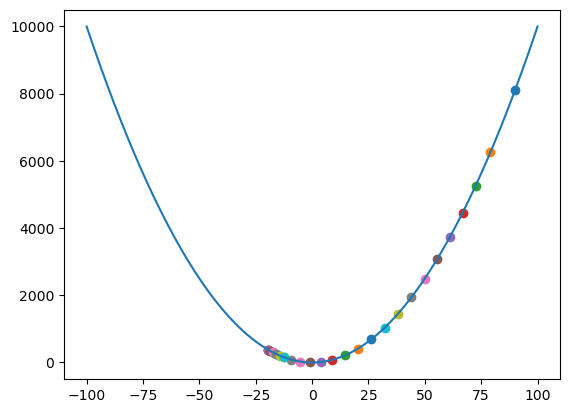

In [9]:
# Adam

x1 = 90
y1 = fun(x1)
em = 0
ev = 0
lr = 10
beta1 = 0.9
beta2 = 0.99
epsilon = 0.00000001

plt.plot(x,y)
for i in range(30):
    plt.scatter(x1,y1)
    g = grad_fun(x1)
    
    em = (beta1 * em) + ((1 - beta1) * g)
    ev = (beta2 * ev) + ((1 - beta2) * (g * g))

    cm = em / (1 - (beta1 ** (i + 1)))
    cv = ev / (1 - (beta2 ** (i + 1)))

    x1 = x1 - (lr/math.sqrt(cv + epsilon)) * (beta1 * em + ((1-beta1)*g / (1-beta1 ** (i+1))))
    y1 = fun(x1)
    print(x1)
plt.show()